# Lab 9: Regression

In the previous lab, you learned to make scatterplots and compute correlation
coefficients. This supplement will show you how to fit lines to data and estimate confidence intervals for a regression.

In this lab, as in Lab 8 on Correlation, you will study the correlation between head size (cubic centimeters) and brain weight (g) for a group of women. 

1. As usual, import pandas, Numpy and Seaborn. For regression, we'll also import sub-libraries to plot lines and calculate regression lines and correlation coefficients.

In [1]:
#TODO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Adds sub-library to plot line
import scipy.stats as stats # Adds sub-library to calculate regression line and correlation coefficient

2. Using pandas, import the file `brainhead.csv` and view the resulting data frame. 

In [2]:
brainhead=pd.read_csv("brainhead.csv")
brainhead

Head Size  Brain Weight
0         2857          1027
1         3436          1235
2         3791          1260
3         3302          1165
4         3104          1080
..         ...           ...
98        3214          1110
99        3394          1215
100       3233          1104
101       3352          1170
102       3391          1120

[103 rows x 2 columns]

3. Make a scatterplot of your data. Don’t plot a regression
line. Note: The general syntax for making a scatterplot from a pandas
dataframe `df` without fitting a line to it (or showing histograms of variables) is:
`sns.lmplot("xvar","yvar",data=df,fit_reg=False)`.

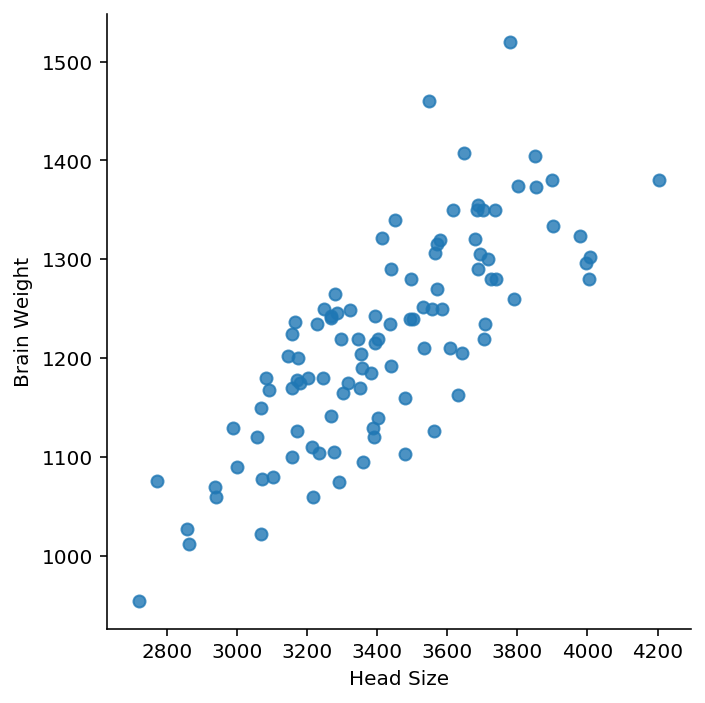

In [3]:
p=sns.lmplot("Head Size", "Brain Weight", data=brainhead, fit_reg=False)

4. Compute the appropriate correlation coefficient and explain why you chose to use that correlation coefficient. In regression, we use the term $R^2$ as the fraction in variance of $y$ that is explained by variance in $x$ and $R^2$ is the square of the Pearson correlation coefficient. Interpret your $R^2$ value. NOTE: Because this time we imported the whole `scipy.stats` library, your syntax will have to be slightly different from last time.

In [4]:
stats.pearsonr(brainhead["Head Size"], brainhead["Brain Weight"])

(0.7751367523575622, 7.322470239243089e-22)

There are several Python functions that can perform linear regression. We
will use one of the simplest, `linregress` from the `scipy.stats` library. The basic syntax is `reg = stats.linregress(xcolumn, ycolumn)`. You can then use
`reg.slope` and `reg.intercept` to get the slope and intercept of your regression line.

5. Run a linear regression on your data and obtain the slope and y-intercept.

In [5]:
reg=stats.linregress(brainhead["Head Size"], brainhead["Brain Weight"])
reg

LinregressResult(slope=0.27280169736173243, intercept=286.087017845948, rvalue=0.775136752357563, pvalue=7.3224702392419185e-22, stderr=0.022124995929903527)

In [6]:
slope=reg.slope
slope

0.27280169736173243

In [7]:
intercept=reg.intercept
intercept

286.087017845948

6. Write the equation for your line and briefly explain what it means

In [8]:
y=slope+intercept

We would now like to plot this regression line. We can do this by picking a
bunch of $x$ values, computing the corresponding $y$ values and plotting the result.

The Numpy command `linspace` generates an array with a specified number
of values between your min and max values. (The rather odd name comes from
the widely used program Matlab, which Numpy and matplotlib often emulate.)
Because you can do arithmetic directly on Numpy arrays, it is then simple to
compute your y values. For example, the following code computes points on the
line $Y = 5X + 10$ for 100 $X$ values between 0 and 7.

`X_plot = np.linspace(0, 7, 100)`

`Y_plot = 5*X plot+10`

The matplotlib command `plot` from the sublibrary `pyplot` (which we've called `plt`) can then plot `X_plot` and `Y_plot` on top of
your scatterplot. Just run it in the same cell as the scatterplot code.

7. Using appropriate max and min values, compute 100 points on your line. View the result.

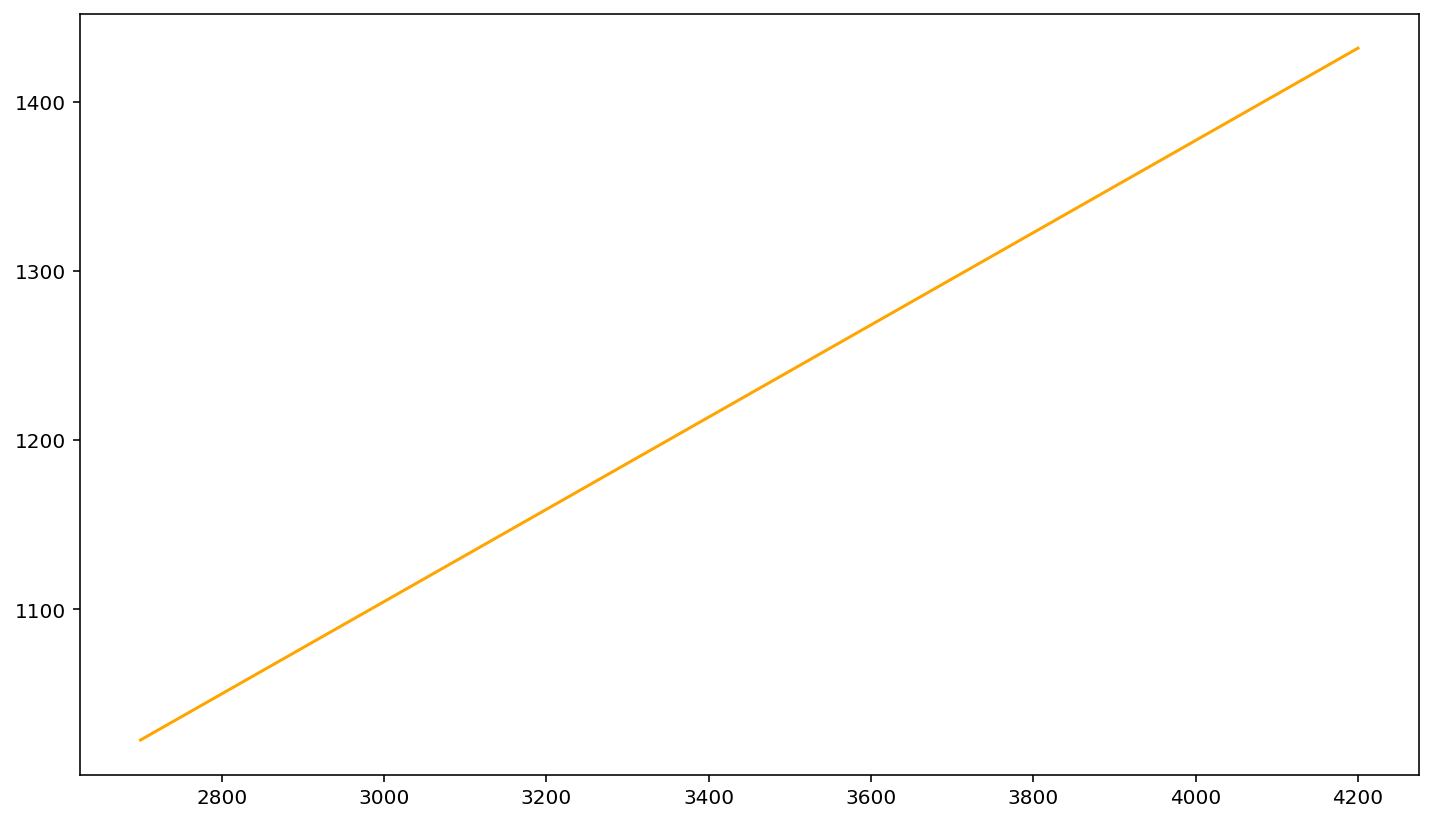

In [36]:
X_plot1=np.linspace(2700, 4200, 100)
Y_plot1=0.27280169736173243*X_plot+286.087017845948
plt.plot(X_plot1, Y_plot1, color="orange")

8. Copy your scatterplot code. Then, overlay a plot of your regression line on top of it.

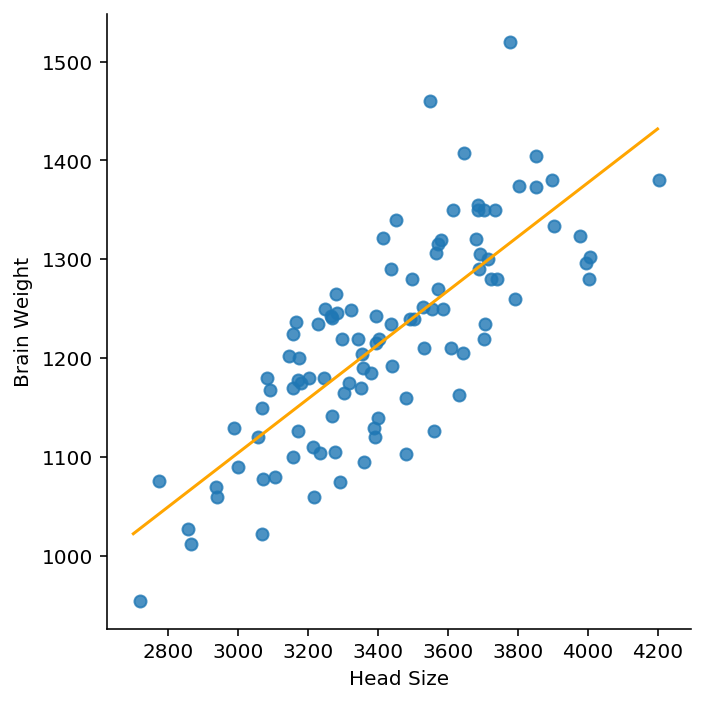

In [22]:
p=sns.lmplot("Head Size", "Brain Weight", data=brainhead, fit_reg=False)
plt.plot(X_plot, Y_plot, color="orange")

## Finding a Confidence Interval

As before, we would like to know how the regression line might be different if we had a somewhat different dataset. The resampling method to find the relevant confidence intervals is almost the same as the one for correlation. The only significant difference is that you will need to keep track of the slopes of regression lines this time.

Note: it is not appropriate to calculate confidence intervals for slope and y-intercept separately since they are calculated together for each simulation. Instead you could graph the regression line of all simulations on one graph to get a visualization of the confidence interval of the regression line.

9. Find the 99% confidence intervals for the slope of your regression line.

In [3]:
#TODO

## Orthogonal Regression

So far, we have performed ordinary least squares regression, which minimizes the vertical distance from a point to the predicted value. This assumes that we know the x-value with much greater precision than the y-value, but often this isn't the case. In such situations, it's better to use orthogonal regression, which minimizes the total distance between the observed and predicted values. This can be done using the Scipy ODR (orthogonal distance regression) library.

10. Import the `scipy.odr` library as `odr`.

In [24]:
import scipy.odr as odr

The functions we will now use work best with Numpy arrays, so let's make a Numpy array version of the brainhead dataset.

11. Make such an array.

In [25]:
hs=np.array(brainhead["Head Size"])
bw=np.array(brainhead["Brain Weight"])

In order to run the ODR fitting function, we need to specify the type of function we want to fit and the data to which we will fit it. There are a couple of different ways to specify the function, but the simplest uses the scipy.odr built-in `polynomial` function. The syntax to create a polynomial of degree $n$ is just `odr.polynomial(n)`. (Remember that the degree of a polynomial is the highest power in it.)

12. Use the `polynomial` function to create a linear function and assign it to a variable. HINT: A line is a polynomial of degree 1.

In [26]:
lin=odr.polynomial(1)

We also need to create a data object using the `odr.Data` function. In its simplest form, which we will use here, this object can be made from just an array of $x$ values and an array of $y$ values. The syntax is `odr.Data(xvals, yvals)`. (Yes, capitalization matters.)

13. Using indexing, make such an object and assign it to a variable.

In [27]:
data=odr.Data(hs, bw)

We can now fit the model function we made earlier to our data. This takes two lines:

`myODR = odr.ODR(data, model) #Capitalization matters`

`ODRfit = myODR.run()`

We can now use the `pprint` function (not a typo!) to view the y-intercept and slope of the regression line. The syntax is:

`ODRfit.pprint()`


14. Fit a line to the brain-head data as described. Find the slope and y-intercept.

In [30]:
myODR=odr.ODR(data, lin)
ODRfit=myODR.run()
ODRfit.pprint()

Beta: [241.24058642   0.28591361]
Beta Std Error: [7.62152398e+01 2.22019640e-02]
Beta Covariance: [[ 1.44087854e+00 -4.18204199e-04]
 [-4.18204199e-04  1.22271860e-07]]
Residual Variance: 4031.403487638505
Inverse Condition #: 2.4863646051725723e-05
Reason(s) for Halting:
  Sum of squares convergence


15. Like before, use the slope and intercept you found to plot the regression line on top of the data.

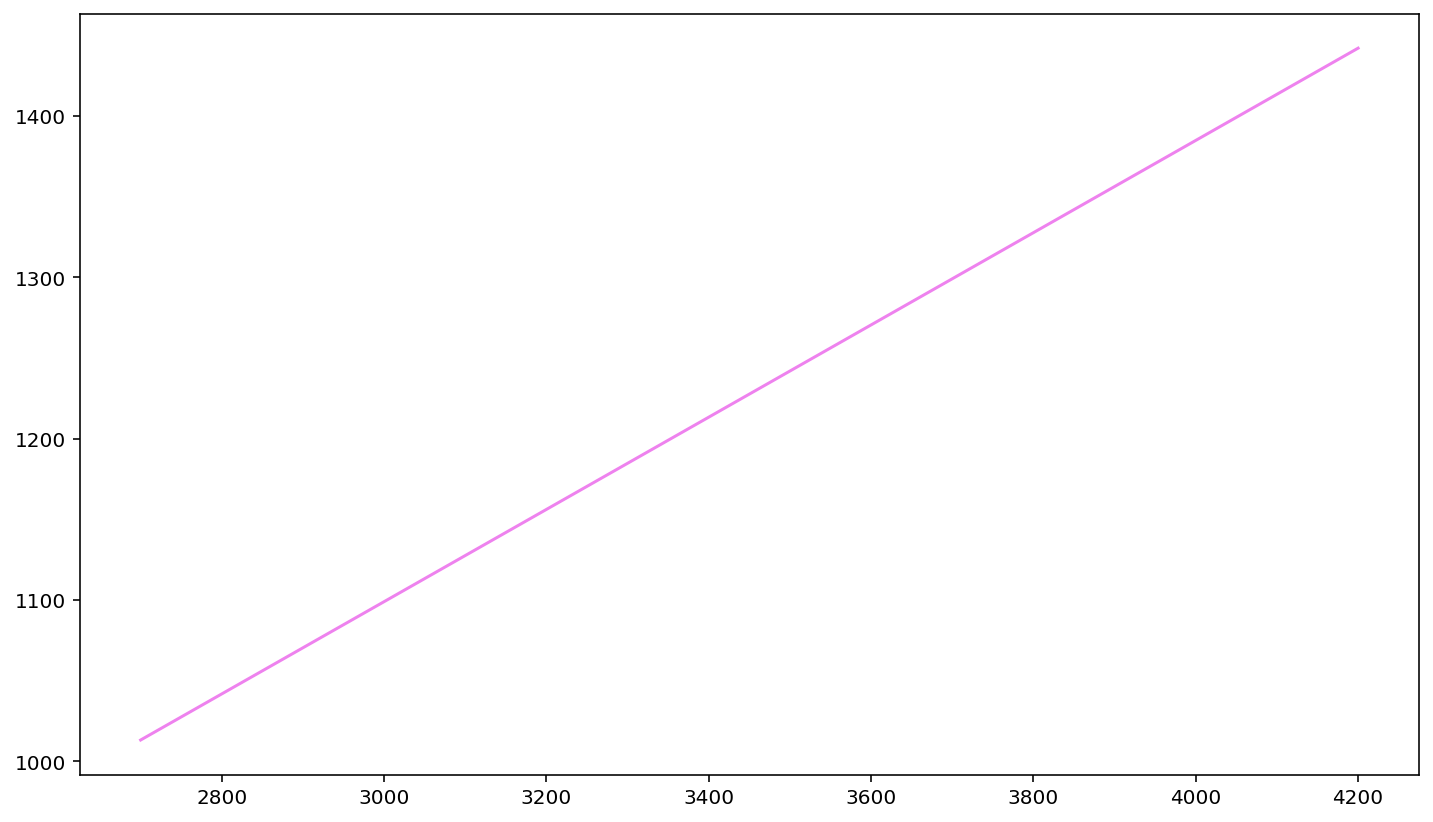

In [40]:
X_plot=np.linspace(2700, 4200, 100)
Y_plot=0.28591361*X_plot+241.24058642
plt.plot(X_plot, Y_plot, color="violet")

([<matplotlib.lines.Line2D at 0x7f0332e10cf8>],
 [<matplotlib.lines.Line2D at 0x7f0333b196a0>])

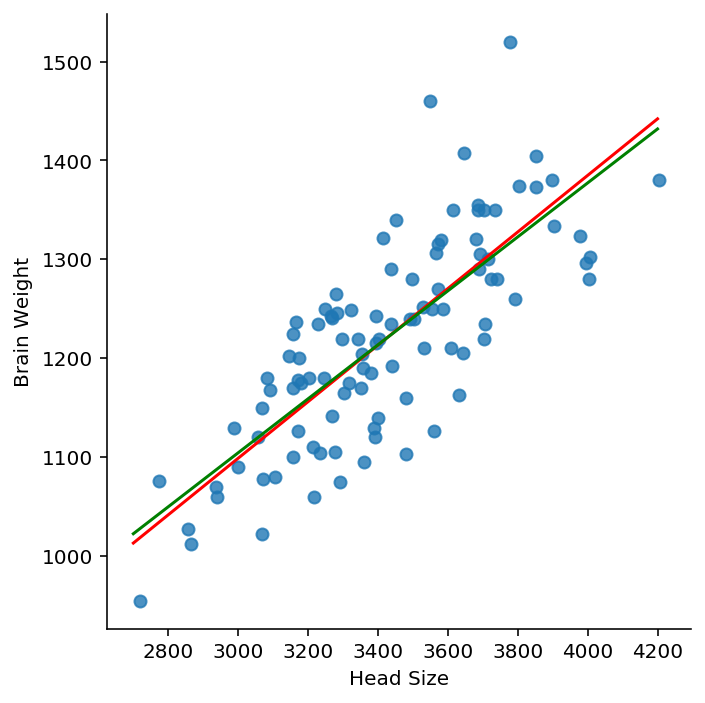

In [42]:
p=sns.lmplot("Head Size", "Brain Weight", data=brainhead, fit_reg=False)
plt.plot(X_plot, Y_plot, color="red"), plt.plot(X_plot1, Y_plot1, color="green")

16. Examine the lines created by least squares regression and orthogonal regression. (You may want to plot both on the same graph.) Does one appear to fit the data better than the other?

In [0]:
#TODO